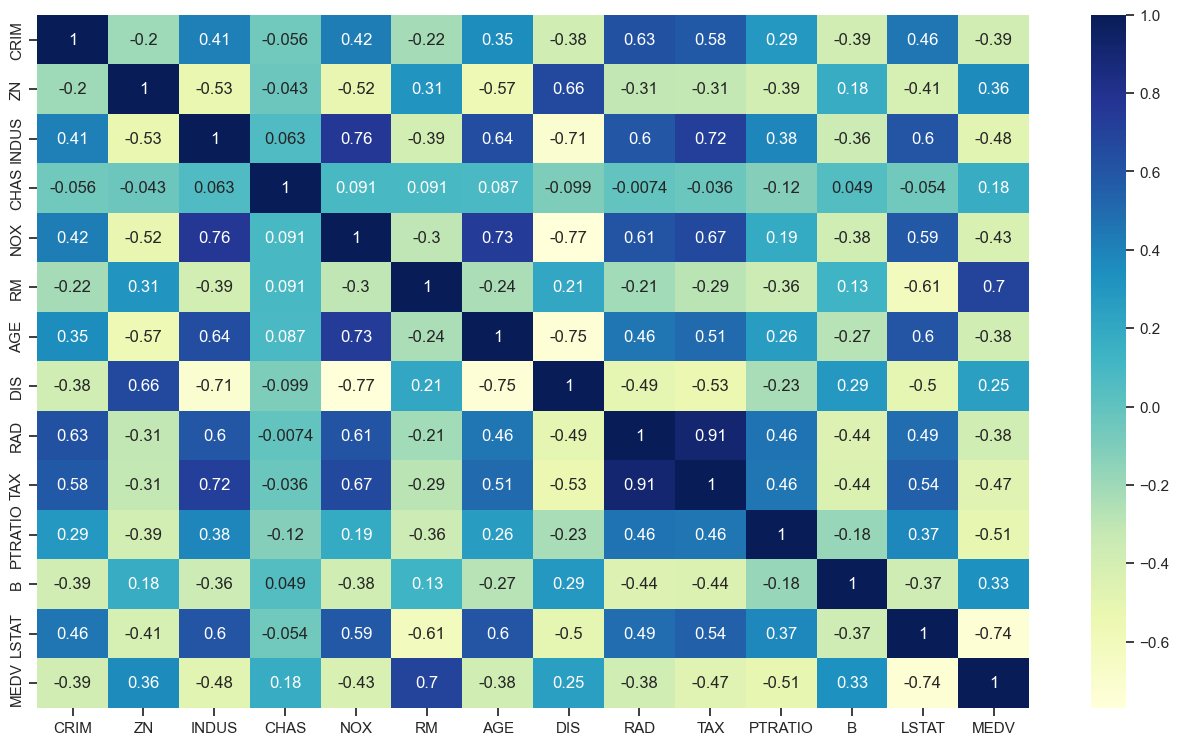

In [1]:
import time
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

warnings.filterwarnings('ignore')

boston = datasets.load_boston()
data =pd.DataFrame(data=boston.data,columns=boston.feature_names)
target = pd.Series(data=boston.target)
target = pd.DataFrame(target,columns = ['MEDV'])
all_data = pd.concat([data,target],axis=1)

fig = plt.figure(figsize=(16, 9))
sns.set_theme(style="ticks")
sns.heatmap(all_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

100%|██████████| 1000/1000 [00:31<00:00, 31.80it/s]


PICP = 0.97, PIMW = 0.81, PIAD = 2.36, Loss = 2.85


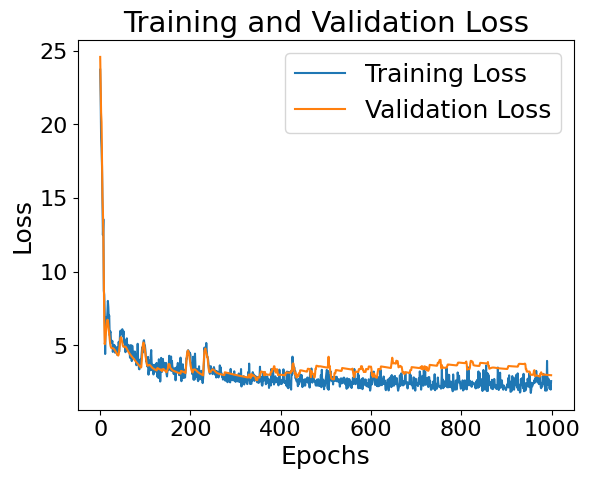

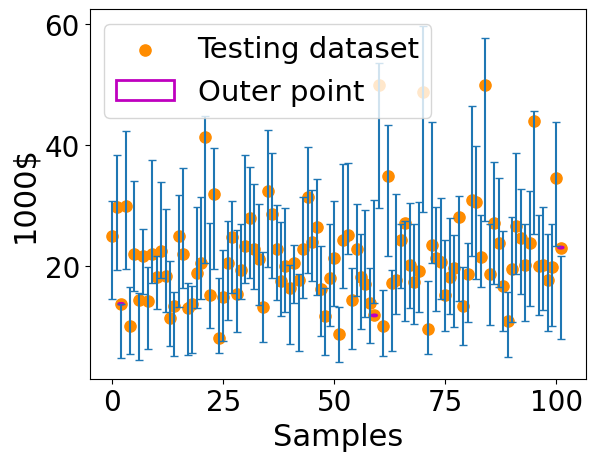

In [1]:
import time

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from models.tensorflow_pi import TF_PI
from utils.tools import Loss_func

train_data, target = load_boston(return_X_y=True)
min_max_scaler = MinMaxScaler()
train_data = min_max_scaler.fit_transform(train_data)
train_X, test_X, train_y, test_y = train_test_split(train_data, target, test_size=0.2,
                                                    random_state=int(time.time()))
train_XX, val_x, tar, val_y = train_test_split(train_X, train_y, test_size=0.2,
                                                random_state=int(time.time()))
alpha = 0.05
weight = [1, 1, 0.5]
tf_pi = TF_PI(alpha, weight=weight)
history = tf_pi.fit(train_XX, tar, (val_x, val_y))
result = tf_pi.predict(test_X)
tf_pi.show_fit_process(history)
model_loss = Loss_func(result, test_y, (1-alpha),
                    list(range(test_X.shape[0])), list(range(test_X.shape[0])), weight=weight)

print("PICP = {}, PIMW = {}, PIAD = {}, Loss = {}".format(model_loss.picp, model_loss.pimw,
                                                        model_loss.piad, model_loss.loss))
from utils.plot_func import PlotErrorBar

PlotErrorBar(result, list(
range(test_X.shape[0])), test_y, model_loss.outlier)